In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape
# 10000 datasets, 32,32 image size, and 3rgb channels

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
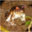

In [4]:
X_train[0]

In [5]:
y_train[:5]

y_train = y_train.reshape(-1,)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

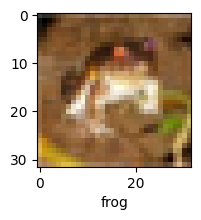

In [6]:
plot_sample(X_train, y_train, 0)

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
#y_train_categorical = tf.keras.utils.to_categorical(y_test,num_classes=10, dtype='float32')
#y_test_categorical = tf.keras.utils.to_categorical(y_test,num_classes=10, dtype='float32')

## Model Building and Training

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8117 - accuracy: 0.3545
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6261 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5422 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4842 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4341 - accuracy: 0.4948


In [10]:
from sklearn .metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.35      0.47      1000
           1       0.68      0.49      0.57      1000
           2       0.43      0.15      0.23      1000
           3       0.45      0.17      0.25      1000
           4       0.31      0.57      0.40      1000
           5       0.52      0.21      0.30      1000
           6       0.53      0.44      0.48      1000
           7       0.28      0.80      0.41      1000
           8       0.72      0.51      0.60      1000
           9       0.47      0.65      0.55      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.43     10000
weighted avg       0.51      0.44      0.43     10000



## Using Convolution Neural Network

In [11]:
cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.8875 - accuracy: 0.3356
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6464 - accuracy: 0.4073
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5665 - accuracy: 0.4389
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5245 - accuracy: 0.4517
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4879 - accuracy: 0.4701
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4594 - accuracy: 0.4760
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4307 - accuracy: 0.4854
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4087 - accuracy: 0.4968
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3953 - accuracy: 0.5004
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.37

In [14]:
y_test = y_test.reshape(-1,)
y_test[:5]



array([3, 8, 8, 0, 6], dtype=uint8)